# Mengimport Library yang Digunakan

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Memanggil Dataset

In [3]:
df1 = pd.read_csv('Dataset_Harga_Rumah_2.csv')

# Melihat Data yang Diload

In [4]:
df1.head()

,no,transaction_date,house_age,distance_to_MRT,number_cs,latitude,longitude,house_price
0,1,1112012,32.0,84.88,10.0,24.98,121.54,379000000
1,2,1112012,19.5,306.59,9.0,24.98,121.54,422000000
2,3,1062013,13.3,561.98,5.0,24.99,121.54,473000000
3,4,1062013,13.3,561.98,5.0,24.99,121.54,548000000
4,5,1092012,5.0,390.57,5.0,24.98,121.54,431000000


In [5]:
df1["no"] = df1["no"].astype("string")
df1["transaction_date"] = df1["transaction_date"].astype("string")
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   no                413 non-null    string 
 1   transaction_date  413 non-null    string 
 2   house_age         413 non-null    float64
 3   distance_to_MRT   413 non-null    float64
 4   number_cs         413 non-null    float64
 5   latitude          413 non-null    float64
 6   longitude         413 non-null    float64
 7   house_price       413 non-null    int64  
dtypes: float64(5), int64(1), string(2)
memory usage: 25.9 KB


In [6]:
df1.describe()

,house_age,distance_to_MRT,number_cs,latitude,longitude,house_price
count,413.000000,413.000000,413.000000,413.000000,413.000000,4.130000e+02
mean,17.719613,1085.558063,4.089588,24.968692,121.532712,3.805375e+08
std,11.405397,1263.181831,2.947636,0.012875,0.015545,1.354032e+08
min,0.000000,23.380000,0.000000,24.930000,121.470000,1.120000e+08
25%,9.000000,289.320000,1.000000,24.960000,121.530000,2.770000e+08
50%,16.100000,492.230000,4.000000,24.970000,121.540000,3.850000e+08
75%,28.200000,1455.800000,6.000000,24.980000,121.540000,4.660000e+08
max,43.800000,6488.020000,10.000000,25.010000,121.570000,1.175000e+09


<Axes: >

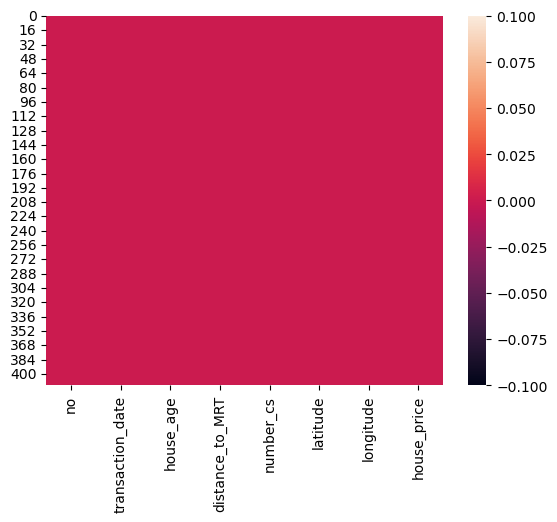

In [7]:
sns.heatmap(df1.isnull())

# Visualisasi Data

<Axes: >

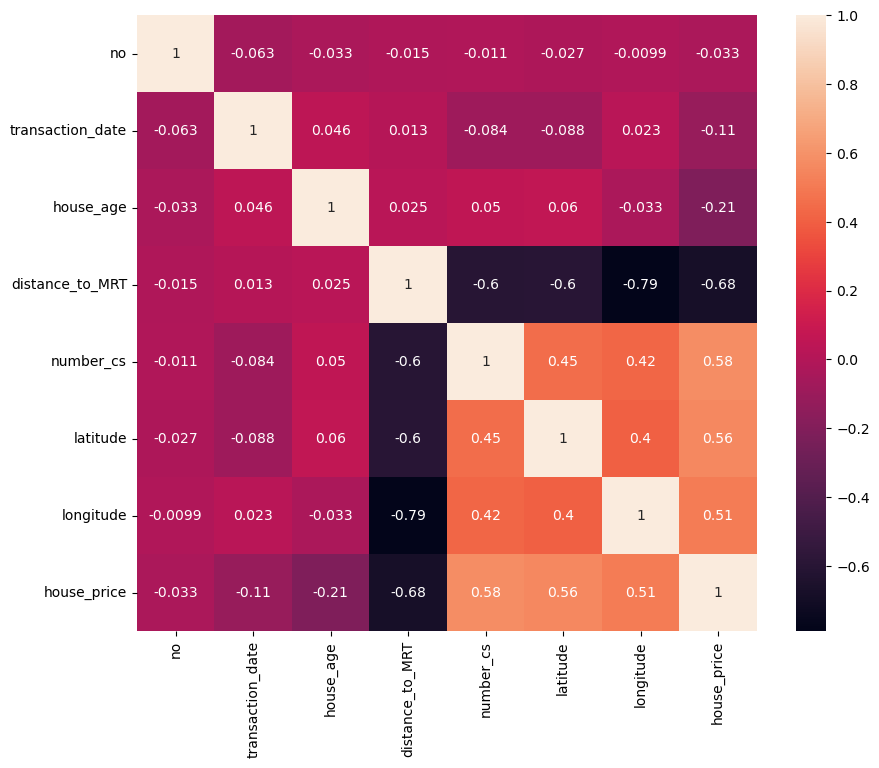

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(df1.corr(),annot=True)

# Jumlah Rumah berdasarkan Number Convenience Store

# Distribusi House Age

# Seleksi Feature

In [16]:
features = ['house_age','distance_to_MRT','number_cs','latitude','longitude']
X = df1[features]
Y = df1['house_price']
X.shape, Y.shape

((413, 5), (413,))

# Split Data

In [17]:
import sklearn.model_selection as ms
X_train, X_test, Y_train, Y_test = ms.train_test_split(X,Y, test_size = 0.2)

X_test.shape, Y_test.shape

((83, 5), (83,))

# Membuat Model Multiple Regresi

In [18]:
import sklearn.linear_model as lm
model1 = lm.LinearRegression()
model1.fit(X_train, Y_train)
Y_prediksi = model1.predict(X_test)

print(Y_prediksi)

[4.88734211e+08 3.69830335e+08 2.50133682e+08 4.87947983e+08
 4.95699625e+08 1.35649023e+08 4.37406143e+08 4.72844540e+08
 3.06503099e+08 2.50874721e+08 4.92932068e+08 3.08477573e+08
 4.92932068e+08 4.67666518e+08 4.03775535e+08 4.69653694e+08
 4.40348989e+08 3.87671714e+08 1.49380990e+08 5.17728210e+08
 4.49856210e+08 1.23633205e+08 3.82553396e+08 2.50187590e+08
 3.31875727e+08 7.70564014e+07 3.29609141e+08 4.83704328e+08
 2.81475139e+08 3.23094914e+08 4.81477506e+08 1.23059223e+08
 3.96752994e+08 5.10829933e+08 4.02932557e+08 3.34937631e+08
 3.53686459e+08 3.31645562e+08 4.56465977e+08 3.25440074e+08
 4.21315461e+08 3.04307312e+08 4.21765306e+08 4.34698265e+08
 4.03211400e+08 4.35106572e+08 4.79503032e+08 3.06411466e+08
 2.95568697e+08 4.28137335e+08 4.07951164e+08 5.17164075e+08
 4.20939349e+08 3.06503099e+08 3.87107579e+08 4.66381549e+08
 4.89953523e+08 3.97715081e+08 2.96696967e+08 4.21213569e+08
 3.08937265e+08 4.74287180e+08 5.24301665e+08 3.48623848e+08
 4.14291086e+08 4.879479

# Mengevaluasi Model

In [19]:
import sklearn.metrics as met

score = model1.score(X_test, Y_test)
r_squared = met.r2_score(Y_test, Y_prediksi)
MAE = met.mean_absolute_error(Y_test, Y_prediksi)
MSE = met.mean_squared_error(Y_test, Y_prediksi)
RMSE = np.sqrt(MSE)
print(f'Akurasi Multiple Linear Regression : {score}')
print(f'R_squared Multiple Linear Regression : {r_squared}')
print(f'MAE Multiple Linear Regression : {MAE}')
print(f'MSE Multiple Linear Regression : {MSE}')
print(f'RMSE Multiple Linear Regression : {RMSE}')

Akurasi Multiple Linear Regression : 0.6599389654679588
R_squared Multiple Linear Regression : 0.6599389654679588
MAE Multiple Linear Regression : 56278214.24712951
MSE Multiple Linear Regression : 4989968248385952.0
RMSE Multiple Linear Regression : 70639707.3067687


# Membuat Inputan

In [22]:
#house_age=30, distansce_to_MRT=90.10, number_cs = 6, latitude = 24, longitude = 121.54
input_data = np.array([[30,90.10,6,24.99,121.54]])

prediction = model1.predict(input_data)
print(f'Estimasi Harga Rumah :', prediction)

Estimasi Harga Rumah : [4.61039046e+08]


/Users/indriastutiichsan/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Save Model

In [23]:
import pickle

filename = 'estimasi_harga_rumah.sav'
pickle.dump(model1,open(filename,'wb'))